# Linguistic Drift Across Time


## Parsing XML

In [1]:
#Importing necessary packages
import xml.etree.ElementTree as ET
import pandas as pd
import seaborn as sns
import numpy as np
import os

In [2]:
#initializing empty dict to store all XMLs with metadata
pubmed_dict = {}

In [30]:
#Headings and keywords
def parse_without_headings(xml):
    #Creating tree and root
    mytree = ET.parse("xml_files\\"+xml)
    myroot = mytree.getroot()
    
    #Storing data under "PubmedArticle" tag in et_targets
    et_targets = myroot.findall('./PubmedArticle')
    columns = ["year", "abstract", "country"]
    rows = []
    for target in et_targets:
        if ((len(target.findall('./MedlineCitation/Article/Journal//JournalIssue//PubDate//Year')) > 0)
            & (len(target.findall('./MedlineCitation/MedlineJournalInfo/Country')) > 0)
            & (len(target.findall('./MedlineCitation//Article//Abstract//AbstractText')) > 0)):

            row = []
            abstract = target.findall('./MedlineCitation//Article//Abstract//AbstractText')[0]
            year = target.findall('./MedlineCitation//Article/Journal//JournalIssue//PubDate//Year')[0]
            country= target.findall('./MedlineCitation/MedlineJournalInfo/Country')[0]

            row.append(year.text)
            row.append(abstract.text)
            row.append(country.text)

            rows.append(row)
            
    return(pd.DataFrame(rows,columns=columns))

In [68]:
#initializing empty dict to store all XMLs with metadata
pubmed_dict = {}

path = os.path.abspath(os.getcwd()+"\\xml_files")
#Loop through all files
for filename in os.listdir(path):
    if not filename.endswith('.xml'): continue
    xml = os.path.join(path, filename)[-17:]
    print(xml)
    
    #process the xml file and store it in a dictionary with xml filename as the key
    pubmed_dict[xml] = parse_without_headings(xml)
    
    #Convert year to numeric
    pubmed_dict[xml]["year"] = pd.to_numeric(pubmed_dict[xml]["year"])

pubmed22n0001.xml
pubmed22n0002.xml
pubmed22n0003.xml
pubmed22n0004.xml
pubmed22n0005.xml
pubmed22n0006.xml
pubmed22n0007.xml
pubmed22n0008.xml
pubmed22n0009.xml
pubmed22n0010.xml
pubmed22n0011.xml
pubmed22n0012.xml
pubmed22n0013.xml
pubmed22n0014.xml
pubmed22n0030.xml
pubmed22n0032.xml
pubmed22n0033.xml
pubmed22n0034.xml
pubmed22n0035.xml
pubmed22n0100.xml
pubmed22n0101.xml
pubmed22n0102.xml
pubmed22n0103.xml
pubmed22n0104.xml
pubmed22n0105.xml
pubmed22n0106.xml
pubmed22n0107.xml
pubmed22n0108.xml
pubmed22n0109.xml
pubmed22n0110.xml
pubmed22n0230.xml
pubmed22n0231.xml
pubmed22n0232.xml
pubmed22n0233.xml
pubmed22n0234.xml
pubmed22n0235.xml
pubmed22n0300.xml
pubmed22n0301.xml
pubmed22n0302.xml
pubmed22n0303.xml
pubmed22n0304.xml
pubmed22n0305.xml
pubmed22n0306.xml
pubmed22n0307.xml
pubmed22n0308.xml
pubmed22n0309.xml
pubmed22n0310.xml
pubmed22n0400.xml
pubmed22n0401.xml
pubmed22n0402.xml
pubmed22n0403.xml
pubmed22n0404.xml
pubmed22n0405.xml
pubmed22n0406.xml
pubmed22n0407.xml
pubmed22n0

In [70]:
#Combining all dataframes from the dictionary
pubmed_df = pd.concat(pubmed_dict.values(), ignore_index=True)

In [71]:
pubmed_df

,year,abstract,country
0,1975,(--)-alpha-Bisabolol has a primary antipeptic ...,Germany
1,1975,A report is given on the recent discovery of o...,Germany
2,1975,The distribution of blood flow to the subendoc...,Germany
3,1975,"The virostatic compound N,N-diethyl-4-[2-(2-ox...",Germany
4,1975,"RMI 61 140, RMI 61 144 and RMI 61 280 are newl...",Germany
...,...,...,...
2078434,2021,To develop and test a method for reducing arti...,United States
2078435,2021,Health insurance coverage is expected to prote...,Iran
2078436,2021,Three-dimensional fast spin-echo (FSE) sequenc...,United States
2078437,2021,The aim of this research was to synthetise the...,Iran


In [72]:
pubmed_df.year.value_counts()[0:50]

2021    361308
2017    233727
1997    204744
2019    204665
2008    191208
2002    187074
1988     98374
2020     68758
1976     54299
1977     51686
1979     50862
1987     41784
1978     41768
1986     34295
1982     29352
1996     26837
2009     26291
1975     23591
2018     20249
1980     19420
1981     19409
2003     18045
2022     12567
1985     12396
2016      6628
2001      4742
1995      3821
2007      3345
1994      2989
2015      2248
2000      2023
1993      2023
2012      1809
1998      1645
1992      1616
1991      1488
1999      1482
1989      1451
1990      1319
2006       938
1983       862
2010       862
2014       853
1984       828
2013       562
2005       488
2004       317
2011       285
1971       187
1970       147
Name: year, dtype: int64

In [73]:
pubmed_df.country.value_counts()

United States          843505
England                478028
Netherlands            146647
Germany                143805
Switzerland            132532
                        ...  
Vietnam                     1
Trinidad and Tobago         1
Mali                        1
Cyprus                      1
Cameroon                    1
Name: country, Length: 105, dtype: int64

<AxesSubplot:>

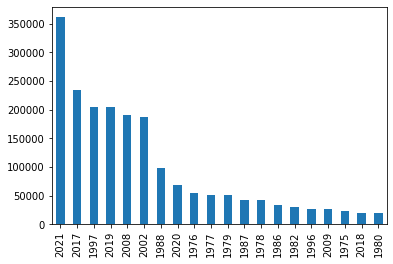

In [4]:
pubmed_df.year.value_counts()[:20].plot(kind='bar')

In [5]:
#Dividing time periods into decade bins
bin1 = pubmed_df.loc[pubmed_df['year'].between(1970,1979)]
bin2 = pubmed_df.loc[pubmed_df['year'].between(1980,1989)]
bin3 = pubmed_df.loc[pubmed_df['year'].between(1990,1999)]
bin4 = pubmed_df.loc[pubmed_df['year'].between(2000,2009)]
bin5 = pubmed_df.loc[pubmed_df['year'].between(2010,2019)]
bin6 = pubmed_df.loc[pubmed_df['year'].between(2020,2029)]

## Word Embeddings

### Pre-processing

In [3]:
import string
import nltk
from nltk.corpus import brown
from nltk.stem import WordNetLemmatizer 
from gensim.models import Word2Vec
import re

from nltk.corpus import stopwords
stop = stopwords.words('english')

from itertools import filterfalse as ifilterfalse

In [12]:
#Initializing dict to store preprocessed abstracts
preprocess_dict = {}

In [9]:
def nlp_preprocessing(dataframe):
    
    #Take only those rows where abstract is not NoneType
    dataframe_final = dataframe[dataframe['abstract'].notna()]
        
    #Remove punctuation
    dataframe_final['abstract'] = list(map(lambda x: re.sub(r'[^\w\s]','',x), dataframe_final['abstract']))
    
    #Splitting sentences in abstract
    dataframe_final['abstract'] = list(map(lambda x: x.split(), dataframe_final['abstract']))
    
    #Converting to lowercase
    dataframe_final['abstract'] = dataframe_final['abstract'].map(lambda x: list(map(str.lower, x)))
    
    #Remove numeric values
    is_integer = lambda s: s.isdigit() or (s[0] == '-' and s[1:].isdigit())
    dataframe_final['abstract'] = list(map(lambda x: ifilterfalse(is_integer, x),dataframe_final['abstract']))
    
    #Remove stopwords
    dataframe_final['abstract'] = dataframe_final['abstract'].apply(lambda x: ' '.join([word for word in x if word not in (stop)]))
    
    #Splitting again after stopword removal
    dataframe_final['abstract'] = list(map(lambda x: x.split(), dataframe_final['abstract']))
    
    #Lemmatize words
    # Init the Wordnet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    dataframe_final['abstract'] = list(map(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in x]), dataframe_final['abstract']))
    
    #Splitting again after lemmatization
    dataframe_final['abstract'] = list(map(lambda x: x.split(), dataframe_final['abstract']))
    
    return dataframe_final

In [10]:
#preprocessing headings
def nlp_preprocessing2(dataframe):
    
    #Take only those rows where abstract is not NoneType
    dataframe_final = dataframe[dataframe['headings'].notna()]
    
    #Remove punctuation
    dataframe_final['headings'] = list(map(lambda x: re.sub(r'[^\w\s]','',x), dataframe_final['headings']))
    
    #Splitting sentences in abstract
    dataframe_final['headings'] = list(map(lambda x: x.split(), dataframe_final['headings']))
    
    #Converting to lowercase
    dataframe_final['headings'] = dataframe_final['headings'].map(lambda x: list(map(str.lower, x)))
    
    #Remove numeric values
    is_integer = lambda s: s.isdigit() or (s[0] == '-' and s[1:].isdigit())
    dataframe_final['headings'] = list(map(lambda x: ifilterfalse(is_integer, x),dataframe_final['headings']))
    
    #Remove stopwords
    dataframe_final['headings'] = dataframe_final['headings'].apply(lambda x: ' '.join([word for word in x if word not in (stop)]))
    
    #Splitting again after stopword removal
    dataframe_final['headings'] = list(map(lambda x: x.split(), dataframe_final['headings']))
    
    #Lemmatize words
    # Init the Wordnet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    dataframe_final['headings'] = list(map(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in x]), dataframe_final['headings']))
    
    #Splitting again after lemmatization
    dataframe_final['headings'] = list(map(lambda x: x.split(), dataframe_final['headings']))
    
    return dataframe_final

In [15]:
#Preprocessing all the bins separately
preprocess_dict['bin1'] = nlp_preprocessing(bin1)
preprocess_dict['bin2'] = nlp_preprocessing(bin2)
preprocess_dict['bin3'] = nlp_preprocessing(bin3)
preprocess_dict['bin4'] = nlp_preprocessing(bin4)
preprocess_dict['bin5'] = nlp_preprocessing(bin5)
preprocess_dict['bin6'] = nlp_preprocessing(bin6)

C:\Users\raefk\AppData\Local\Temp/ipykernel_22132/1303804894.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_final['abstract'] = list(map(lambda x: re.sub(r'[^\w\s]','',x), dataframe_final['abstract']))
C:\Users\raefk\AppData\Local\Temp/ipykernel_22132/1303804894.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_final['abstract'] = list(map(lambda x: x.split(), dataframe_final['abstract']))
C:\Users\raefk\AppData\Local\Temp/ipykernel_22132/1303804894.py:18: SettingWithCopyWarning

In [17]:
#Combining all dataframes from the dictionary
preprocessed_df = pd.concat(preprocess_dict.values(), ignore_index=True)

In [39]:
preprocess_dict2 = nlp_preprocessing2(pubmed_df2)

C:\Users\raefk\AppData\Local\Temp/ipykernel_20496/2455918594.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_final['headings'] = list(map(lambda x: re.sub(r'[^\w\s]','',x), dataframe_final['headings']))
C:\Users\raefk\AppData\Local\Temp/ipykernel_20496/2455918594.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_final['headings'] = list(map(lambda x: x.split(), dataframe_final['headings']))
C:\Users\raefk\AppData\Local\Temp/ipykernel_20496/2455918594.py:18: SettingWithCopyWarning

### Word2Vec model

In [4]:
w2vmodel_dict = {}

In [6]:
def w2vmodel(df):
    # Creating Word2Vec
    model = Word2Vec(
        sentences = df['abstract'],
        vector_size = 50,
        window = 10,
        epochs = 20,
    )
    
    return model

In [24]:
w2vmodel_dict['bin1'] = w2vmodel(preprocess_dict['bin1'])
w2vmodel_dict['bin2'] = w2vmodel(preprocess_dict['bin2'])
w2vmodel_dict['bin3'] = w2vmodel(preprocess_dict['bin3'])
w2vmodel_dict['bin4'] = w2vmodel(preprocess_dict['bin4'])
w2vmodel_dict['bin5'] = w2vmodel(preprocess_dict['bin5'])
w2vmodel_dict['bin6'] = w2vmodel(preprocess_dict['bin6'])

In [25]:
#Save a model
w2vmodel_dict['bin1'].save("bin1.model")
w2vmodel_dict['bin2'].save("bin2.model")
w2vmodel_dict['bin3'].save("bin3.model")
w2vmodel_dict['bin4'].save("bin4.model")
w2vmodel_dict['bin5'].save("bin5.model")
w2vmodel_dict['bin6'].save("bin6.model")

In [5]:
#Load a model
w2vmodel_dict['bin1'] = Word2Vec.load("bin1.model")
w2vmodel_dict['bin2'] = Word2Vec.load("bin2.model")
w2vmodel_dict['bin3'] = Word2Vec.load("bin3.model")
w2vmodel_dict['bin4'] = Word2Vec.load("bin4.model")
w2vmodel_dict['bin5'] = Word2Vec.load("bin5.model")
w2vmodel_dict['bin6'] = Word2Vec.load("bin6.model")

### Tableau Preprocessing

#### Radial LineChart

In [320]:
words_bin1 = pd.DataFrame(w2vmodel_dict['bin1'].wv.most_similar("cigarette", topn=50))
words_bin1['Year'] = '1970s'
words_bin1['root_word'] = 'cigarette'

words_bin2 = pd.DataFrame(w2vmodel_dict['bin2'].wv.most_similar("cigarette", topn=50))
words_bin2['Year'] = '1980s'
words_bin2['root_word'] = 'cigarette'

words_bin3 = pd.DataFrame(w2vmodel_dict['bin3'].wv.most_similar("cigarette", topn=50))
words_bin3['Year'] = '1990s'
words_bin3['root_word'] = 'cigarette'

words_bin4 = pd.DataFrame(w2vmodel_dict['bin4'].wv.most_similar("cigarette", topn=50))
words_bin4['Year'] = '2000s'
words_bin4['root_word'] = 'cigarette'

words_bin5 = pd.DataFrame(w2vmodel_dict['bin5'].wv.most_similar("cigarette", topn=50))
words_bin5['Year'] = '2010s'
words_bin5['root_word'] = 'cigarette'

words_bin6 = pd.DataFrame(w2vmodel_dict['bin6'].wv.most_similar("cigarette", topn=50))
words_bin6['Year'] = '2020s'
words_bin6['root_word'] = 'cigarette'

In [321]:
words = ((((words_bin1.append(words_bin2)).append(words_bin3)).append(words_bin4)).append(words_bin5)).append(words_bin6)

C:\Users\raefk\AppData\Local\Temp/ipykernel_24848/2232260343.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = ((((words_bin1.append(words_bin2)).append(words_bin3)).append(words_bin4)).append(words_bin5)).append(words_bin6)
C:\Users\raefk\AppData\Local\Temp/ipykernel_24848/2232260343.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = ((((words_bin1.append(words_bin2)).append(words_bin3)).append(words_bin4)).append(words_bin5)).append(words_bin6)
C:\Users\raefk\AppData\Local\Temp/ipykernel_24848/2232260343.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = ((((words_bin1.append(words_bin2)).append(words_bin3)).append(words_bin4)).append(words_bin5)).append(words_bin6)
C:\Users\raefk\AppData\Local

In [322]:
words.columns = ['Word', 'Similarity', 'Year', 'Root_Word']

In [323]:
#Mark words if duplicate
words['Duplicate'] = words.Word.duplicated(keep = False)

In [324]:
#Sort by duplicate and year
words = words.sort_values(['Year','Duplicate'])

In [325]:
words = words.reset_index().reset_index()

In [326]:
words['Rank'] = words.level_0+1
words['Link'] = 1

In [327]:
words = words[['Link','Rank','Word','Similarity','Year','Duplicate','Root_Word']]

In [328]:
words

,Link,Rank,Word,Similarity,Year,Duplicate,Root_Word
0,1,1,hashish,0.632637,1970s,False,cigarette
1,1,2,cola,0.631948,1970s,False,cigarette
2,1,3,hightar,0.618815,1970s,False,cigarette
3,1,4,lnp,0.608974,1970s,False,cigarette
4,1,5,abstained,0.594247,1970s,False,cigarette
...,...,...,...,...,...,...,...
295,1,296,inhaling,0.642759,2020s,True,cigarette
296,1,297,exsmokers,0.636098,2020s,True,cigarette
297,1,298,nonsmoker,0.633004,2020s,True,cigarette
298,1,299,snuff,0.630166,2020s,True,cigarette


In [329]:
words['shifted_year'] = words.Year.shift()

In [330]:
words['axis_rank'] = np.where(words.Year != words.shifted_year, words.Rank - 0.5, None)

In [331]:
words

,Link,Rank,Word,Similarity,Year,Duplicate,Root_Word,shifted_year,axis_rank
0,1,1,hashish,0.632637,1970s,False,cigarette,NaN,0.5
1,1,2,cola,0.631948,1970s,False,cigarette,1970s,None
2,1,3,hightar,0.618815,1970s,False,cigarette,1970s,None
3,1,4,lnp,0.608974,1970s,False,cigarette,1970s,None
4,1,5,abstained,0.594247,1970s,False,cigarette,1970s,None
...,...,...,...,...,...,...,...,...,...
295,1,296,inhaling,0.642759,2020s,True,cigarette,2020s,None
296,1,297,exsmokers,0.636098,2020s,True,cigarette,2020s,None
297,1,298,nonsmoker,0.633004,2020s,True,cigarette,2020s,None
298,1,299,snuff,0.630166,2020s,True,cigarette,2020s,None


In [332]:
words.to_excel("test.xlsx",index = False)

#### Spiral chart

In [20]:
words_spiral = words

In [21]:
words_spiral_orig = words_spiral

In [160]:
words_spiral = words_spiral_orig

In [161]:
words_spiral.Word.sort_values().unique()

array(['acculturative', 'actor', 'affective', 'affectivity', 'aggression',
       'agoraphobia', 'alexithymia', 'alienation', 'anger', 'angry',
       'anhedonia', 'anhedonic', 'antisocial', 'anxietydepression',
       'anxious', 'apprehension', 'arousal', 'aspd', 'attributional',
       'bdiii', 'bulimic', 'carpipramine', 'catastrophizing',
       'childreported', 'cognition', 'cognitive', 'cognitiveaffective',
       'compulsive', 'coping', 'craving', 'cyberchondria',
       'defensiveness', 'delinquent', 'denial', 'depersonalization',
       'depression', 'depressionanxiety', 'depressive', 'distress',
       'distressed', 'dreaming', 'dysphoria', 'dysphoric', 'emotional',
       'emotionality', 'emotionally', 'empathy', 'euphoria',
       'extraversion', 'fear', 'fearfulness', 'feeling', 'gad', 'gad7',
       'guilt', 'hassle', 'helplessness', 'hopelessness', 'hostility',
       'hyperarousal', 'hypersexuality', 'hypnosis', 'hypochondriasis',
       'hypomanic', 'impulsive', 'impuls

In [162]:
word_list = ['apprehension','alienation','loneliness','anger','distress','fear','guilt','sadness','unhappiness',
             'mood','carpipramine','mmpi','tiapride','depression','ptsd','aspd','obsessivecompulsive','selfconfidence',
             'euphoria','pleasure','warmth','wellbeing','selfconfidence','selfcriticism','selfesteem','selfimage',
             'selfreport','bdiii','stai','scl90'
            ]

In [163]:
len(word_list)

30

In [164]:
words_spiral = words_spiral[words_spiral.Word.isin(word_list)]

In [165]:
words_spiral

,Link,Rank,Word,Similarity,Year,Duplicate,Root_Word,shifted_year,axis_rank
1,1,2,euphoria,0.773934,1970s,False,anxiety,1970s,None
5,1,6,apprehension,0.745540,1970s,False,anxiety,1970s,None
9,1,10,carpipramine,0.738652,1970s,False,anxiety,1970s,None
10,1,11,alienation,0.737370,1970s,False,anxiety,1970s,None
13,1,14,unhappiness,0.727552,1970s,False,anxiety,1970s,None
...,...,...,...,...,...,...,...,...,...
280,1,281,selfesteem,0.739143,2020s,True,anxiety,2020s,None
281,1,282,fear,0.736882,2020s,True,anxiety,2020s,None
282,1,283,distress,0.736492,2020s,True,anxiety,2020s,None
283,1,284,loneliness,0.732812,2020s,True,anxiety,2020s,None


In [166]:
feelings = 'apprehension','alienation','loneliness','anger','distress','fear','guilt','sadness','unhappiness','mood'
medication = 'carpipramine','mmpi','tiapride'
mental_illness = 'depression','ptsd','aspd','obsessivecompulsive'
positive = 'selfconfidence','euphoria','pleasure','warmth','wellbeing'
self = 'selfconfidence','selfcriticism','selfesteem','selfimage','selfreport'
tests = 'bdiii','stai','scl90'

In [167]:
words_spiral['category'] = None

C:\Users\raefk\AppData\Local\Temp/ipykernel_26452/3139961315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words_spiral['category'] = None


In [168]:
#Assign category to words
for i in range(0,len(words_spiral)):
    if words_spiral['Word'].iloc[i] in feelings:
        words_spiral['category'].iloc[i] = 'feelings'
    elif words_spiral['Word'].iloc[i] in medication:
        words_spiral['category'].iloc[i] = 'medication'
    elif words_spiral['Word'].iloc[i] in mental_illness:
        words_spiral['category'].iloc[i] = 'mental illness'
    elif words_spiral['Word'].iloc[i] in positive:
        words_spiral['category'].iloc[i] = 'positive'
    elif words_spiral['Word'].iloc[i] in self:
        words_spiral['category'].iloc[i] = 'self'
    elif words_spiral['Word'].iloc[i] in tests:
        words_spiral['category'].iloc[i] = 'tests'

C:\Users\raefk\AppData\Local\Temp/ipykernel_26452/3621028206.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words_spiral['category'].iloc[i] = 'positive'
C:\Users\raefk\AppData\Local\Temp/ipykernel_26452/3621028206.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words_spiral['category'].iloc[i] = 'feelings'
C:\Users\raefk\AppData\Local\Temp/ipykernel_26452/3621028206.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words_s

In [169]:
words_spiral

,Link,Rank,Word,Similarity,Year,Duplicate,Root_Word,shifted_year,axis_rank,category
1,1,2,euphoria,0.773934,1970s,False,anxiety,1970s,None,positive
5,1,6,apprehension,0.745540,1970s,False,anxiety,1970s,None,feelings
9,1,10,carpipramine,0.738652,1970s,False,anxiety,1970s,None,medication
10,1,11,alienation,0.737370,1970s,False,anxiety,1970s,None,feelings
13,1,14,unhappiness,0.727552,1970s,False,anxiety,1970s,None,feelings
...,...,...,...,...,...,...,...,...,...,...
280,1,281,selfesteem,0.739143,2020s,True,anxiety,2020s,None,self
281,1,282,fear,0.736882,2020s,True,anxiety,2020s,None,feelings
282,1,283,distress,0.736492,2020s,True,anxiety,2020s,None,feelings
283,1,284,loneliness,0.732812,2020s,True,anxiety,2020s,None,feelings


In [170]:
#Sort by word and year
#words_spiral = words_spiral.sort_values(['Word','Year'])

#Sort by category and word and year
words_spiral = words_spiral.sort_values(['category', 'Word','Year'])

In [171]:
words_spiral

,Link,Rank,Word,Similarity,Year,Duplicate,Root_Word,shifted_year,axis_rank,category
10,1,11,alienation,0.737370,1970s,False,anxiety,1970s,None,feelings
26,1,27,anger,0.792105,1970s,True,anxiety,1970s,None,feelings
67,1,68,anger,0.838044,1980s,True,anxiety,1980s,None,feelings
112,1,113,anger,0.813858,1990s,True,anxiety,1990s,None,feelings
167,1,168,anger,0.803474,2000s,True,anxiety,2000s,None,feelings
...,...,...,...,...,...,...,...,...,...,...
232,1,233,selfreport,0.753861,2010s,True,anxiety,2010s,None,self
292,1,293,selfreport,0.707427,2020s,True,anxiety,2020s,None,self
255,1,256,bdiii,0.719162,2020s,False,anxiety,2020s,None,tests
50,1,51,scl90,0.774918,1980s,False,anxiety,1970s,50.5,tests


In [172]:
test = words_spiral

In [173]:
#Add extra rows for missing decades
total_years = set(['1970s','1980s','1990s','2000s','2010s','2020s'])
for words in words_spiral.Word.unique():
    no_of_years = len(words_spiral[words_spiral.Word == words])
    if no_of_years < 6:
        set_of_years = set(words_spiral[words_spiral.Word == words].Year)
        missing_years = (set_of_years)^(total_years)
        #Add additional rows for each missing year
        for years in missing_years:
            df_test = words_spiral[words_spiral.Word == words].iloc[0]
            df_test['Year'] = years
            df_test['Similarity'] = 0
            words_spiral = words_spiral.append(df_test)
    
words_spiral = words_spiral.sort_values(['Word','Year'])

C:\Users\raefk\AppData\Local\Temp/ipykernel_26452/807560476.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words_spiral = words_spiral.append(df_test)
C:\Users\raefk\AppData\Local\Temp/ipykernel_26452/807560476.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words_spiral = words_spiral.append(df_test)
C:\Users\raefk\AppData\Local\Temp/ipykernel_26452/807560476.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words_spiral = words_spiral.append(df_test)
C:\Users\raefk\AppData\Local\Temp/ipykernel_26452/807560476.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words_spiral = words_spiral.append(df_test)
C:\Users\raefk\A

C:\Users\raefk\AppData\Local\Temp/ipykernel_26452/807560476.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words_spiral = words_spiral.append(df_test)
C:\Users\raefk\AppData\Local\Temp/ipykernel_26452/807560476.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words_spiral = words_spiral.append(df_test)
C:\Users\raefk\AppData\Local\Temp/ipykernel_26452/807560476.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words_spiral = words_spiral.append(df_test)
C:\Users\raefk\AppData\Local\Temp/ipykernel_26452/807560476.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words_spiral = words_spiral.append(df_test)
C:\Users\raefk\A

C:\Users\raefk\AppData\Local\Temp/ipykernel_26452/807560476.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words_spiral = words_spiral.append(df_test)
C:\Users\raefk\AppData\Local\Temp/ipykernel_26452/807560476.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words_spiral = words_spiral.append(df_test)
C:\Users\raefk\AppData\Local\Temp/ipykernel_26452/807560476.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words_spiral = words_spiral.append(df_test)
C:\Users\raefk\AppData\Local\Temp/ipykernel_26452/807560476.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words_spiral = words_spiral.append(df_test)
C:\Users\raefk\A

In [174]:
words_spiral = pd.DataFrame(np.repeat(words_spiral.values, 10, axis = 0))
words_spiral.columns = test.columns

In [175]:
#Sort by category and word and year
words_spiral = words_spiral.sort_values(['category', 'Word','Year'])

In [176]:
words_spiral[150:200]

,Link,Rank,Word,Similarity,Year,Duplicate,Root_Word,shifted_year,axis_rank,category
150,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings
151,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings
152,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings
153,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings
154,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings
155,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings
156,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings
157,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings
158,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings
159,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings


In [177]:
word_ranks = pd.DataFrame(words_spiral.Word.unique(), columns = ['words'])

In [178]:
word_ranks

,words
0,alienation
1,anger
2,apprehension
3,distress
4,fear
5,guilt
6,loneliness
7,mood
8,sadness
9,unhappiness


In [179]:
word_ranks['ID'] = None
counter = 1
for i in range(0,len(word_ranks)):
    word_ranks['ID'].iloc[i] = counter
    counter = counter + 1

In [180]:
word_ranks

,words,ID
0,alienation,1
1,anger,2
2,apprehension,3
3,distress,4
4,fear,5
5,guilt,6
6,loneliness,7
7,mood,8
8,sadness,9
9,unhappiness,10


In [181]:
#Assigning Rank
words_spiral = pd.merge(words_spiral,word_ranks,left_on = 'Word',right_on = 'words', how = 'left')

In [182]:
words_spiral[150:200]

,Link,Rank,Word,Similarity,Year,Duplicate,Root_Word,shifted_year,axis_rank,category,words,ID
150,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings,apprehension,3
151,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings,apprehension,3
152,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings,apprehension,3
153,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings,apprehension,3
154,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings,apprehension,3
155,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings,apprehension,3
156,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings,apprehension,3
157,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings,apprehension,3
158,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings,apprehension,3
159,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings,apprehension,3


In [183]:
"""
#Assign a rank to each word
words_spiral['ID'] = 1
counter = 1
for i in range(1,len(words_spiral)):
    #print(test.Word[i])
    if words_spiral.Word[i] != words_spiral.Word[i-1]:
        counter = counter + 1
        words_spiral.ID[i] = counter
    else:
        words_spiral.ID[i] = counter
"""

"\n#Assign a rank to each word\nwords_spiral['ID'] = 1\ncounter = 1\nfor i in range(1,len(words_spiral)):\n    #print(test.Word[i])\n    if words_spiral.Word[i] != words_spiral.Word[i-1]:\n        counter = counter + 1\n        words_spiral.ID[i] = counter\n    else:\n        words_spiral.ID[i] = counter\n"

In [185]:
words_ranked = words_spiral

In [186]:
words_spiral = words_ranked

In [187]:
words_spiral

,Link,Rank,Word,Similarity,Year,Duplicate,Root_Word,shifted_year,axis_rank,category,words,ID
0,1,11,alienation,0.73737,1970s,False,anxiety,1970s,None,feelings,alienation,1
1,1,11,alienation,0.73737,1970s,False,anxiety,1970s,None,feelings,alienation,1
2,1,11,alienation,0.73737,1970s,False,anxiety,1970s,None,feelings,alienation,1
3,1,11,alienation,0.73737,1970s,False,anxiety,1970s,None,feelings,alienation,1
4,1,11,alienation,0.73737,1970s,False,anxiety,1970s,None,feelings,alienation,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1735,1,258,stai,0.710715,2020s,False,anxiety,2020s,None,tests,stai,29
1736,1,258,stai,0.710715,2020s,False,anxiety,2020s,None,tests,stai,29
1737,1,258,stai,0.710715,2020s,False,anxiety,2020s,None,tests,stai,29
1738,1,258,stai,0.710715,2020s,False,anxiety,2020s,None,tests,stai,29


In [188]:
test = words_spiral[['Link','Word','Duplicate','Root_Word','category', 'ID']].drop_duplicates()

In [189]:
test['Rank'] = None
test['Similarity'] = None
test['Year'] = None
test['shifted_year'] = None
test['axis_rank'] = None

In [190]:
test = test[['Link','Rank','Word','Similarity','Year','Duplicate','Root_Word','shifted_year','axis_rank','category','ID']]

In [192]:
words_spiral = words_spiral.drop('words',axis=1)

In [193]:
words_spiral

,Link,Rank,Word,Similarity,Year,Duplicate,Root_Word,shifted_year,axis_rank,category,ID
0,1,11,alienation,0.73737,1970s,False,anxiety,1970s,None,feelings,1
1,1,11,alienation,0.73737,1970s,False,anxiety,1970s,None,feelings,1
2,1,11,alienation,0.73737,1970s,False,anxiety,1970s,None,feelings,1
3,1,11,alienation,0.73737,1970s,False,anxiety,1970s,None,feelings,1
4,1,11,alienation,0.73737,1970s,False,anxiety,1970s,None,feelings,1
...,...,...,...,...,...,...,...,...,...,...,...
1735,1,258,stai,0.710715,2020s,False,anxiety,2020s,None,tests,29
1736,1,258,stai,0.710715,2020s,False,anxiety,2020s,None,tests,29
1737,1,258,stai,0.710715,2020s,False,anxiety,2020s,None,tests,29
1738,1,258,stai,0.710715,2020s,False,anxiety,2020s,None,tests,29


In [194]:
#20 values are needed to get 80 points and make a complete circle. Adding 21 values to get 360 degrees
test = pd.DataFrame(np.repeat(test.values, 21, axis = 0))
test.columns = words_spiral.columns

In [196]:
words_spiral = words_spiral.append(test).sort_values(['Word','Year'])

C:\Users\raefk\AppData\Local\Temp/ipykernel_26452/3686133694.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words_spiral = words_spiral.append(test).sort_values(['Word','Year'])


In [197]:
words_spiral[200:250]

,Link,Rank,Word,Similarity,Year,Duplicate,Root_Word,shifted_year,axis_rank,category,ID
158,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings,3
159,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings,3
160,1,6,apprehension,0.0,2010s,False,anxiety,1970s,None,feelings,3
161,1,6,apprehension,0.0,2010s,False,anxiety,1970s,None,feelings,3
162,1,6,apprehension,0.0,2010s,False,anxiety,1970s,None,feelings,3
163,1,6,apprehension,0.0,2010s,False,anxiety,1970s,None,feelings,3
164,1,6,apprehension,0.0,2010s,False,anxiety,1970s,None,feelings,3
165,1,6,apprehension,0.0,2010s,False,anxiety,1970s,None,feelings,3
166,1,6,apprehension,0.0,2010s,False,anxiety,1970s,None,feelings,3
167,1,6,apprehension,0.0,2010s,False,anxiety,1970s,None,feelings,3


In [198]:
#Add ID to all occurrences of a single word
words_spiral['ID21'] = words_spiral.groupby('Word').cumcount()

In [199]:
#angle calculation
#(360*0.75)/60
#360/4.5
#So, 80 points on the circle. We have 60 present. The last 20 should be blank rows with year as null

angle = (360*0.75)/60

In [200]:
angle

4.5

In [201]:
import math

In [202]:
words_spiral['angle'] = words_spiral['ID21']*(angle)
words_spiral['X1'] = math.sqrt(2) * np.sin(words_spiral['angle'] * math.pi / 180)
words_spiral['Y1'] = math.sqrt(2) * np.cos(words_spiral['angle'] * math.pi / 180)

In [203]:
words_spiral[50:100]

,Link,Rank,Word,Similarity,Year,Duplicate,Root_Word,shifted_year,axis_rank,category,ID,ID21,angle,X1,Y1
50,1,11,alienation,0.0,2020s,False,anxiety,1970s,None,feelings,1,50,225.0,-1.000000e+00,-1.000000e+00
51,1,11,alienation,0.0,2020s,False,anxiety,1970s,None,feelings,1,51,229.5,-1.075376e+00,-9.184582e-01
52,1,11,alienation,0.0,2020s,False,anxiety,1970s,None,feelings,1,52,234.0,-1.144123e+00,-8.312539e-01
53,1,11,alienation,0.0,2020s,False,anxiety,1970s,None,feelings,1,53,238.5,-1.205815e+00,-7.389246e-01
54,1,11,alienation,0.0,2020s,False,anxiety,1970s,None,feelings,1,54,243.0,-1.260074e+00,-6.420395e-01
55,1,11,alienation,0.0,2020s,False,anxiety,1970s,None,feelings,1,55,247.5,-1.306563e+00,-5.411961e-01
56,1,11,alienation,0.0,2020s,False,anxiety,1970s,None,feelings,1,56,252.0,-1.344997e+00,-4.370160e-01
57,1,11,alienation,0.0,2020s,False,anxiety,1970s,None,feelings,1,57,256.5,-1.375139e+00,-3.301416e-01
58,1,11,alienation,0.0,2020s,False,anxiety,1970s,None,feelings,1,58,261.0,-1.396802e+00,-2.212317e-01
59,1,11,alienation,0.0,2020s,False,anxiety,1970s,None,feelings,1,59,265.5,-1.409854e+00,-1.109579e-01


In [204]:
#path variable (for spiral, angle 360 to 270 should increment from 1 backwards, then angle 0 to 270 should increment normally)
words_spiral['path'] =  np.where(
        words_spiral['ID21'] < 60, 
        words_spiral['ID21'] + 22,
        1
        )

In [205]:
#words_spiral[words_spiral['ID21'] == 60]['path']
words_spiral.loc[words_spiral['ID21'] == 61, 'path'] = 2

In [206]:
#increase counter from 1 to 20 for angle 270 onwards
counter = 1
for i in range(80,59,-1):
    words_spiral.loc[words_spiral['ID21'] == i, 'path'] = counter
    counter = counter + 1

In [207]:
words_spiral[50:100]

,Link,Rank,Word,Similarity,Year,Duplicate,Root_Word,shifted_year,axis_rank,category,ID,ID21,angle,X1,Y1,path
50,1,11,alienation,0.0,2020s,False,anxiety,1970s,None,feelings,1,50,225.0,-1.000000e+00,-1.000000e+00,72
51,1,11,alienation,0.0,2020s,False,anxiety,1970s,None,feelings,1,51,229.5,-1.075376e+00,-9.184582e-01,73
52,1,11,alienation,0.0,2020s,False,anxiety,1970s,None,feelings,1,52,234.0,-1.144123e+00,-8.312539e-01,74
53,1,11,alienation,0.0,2020s,False,anxiety,1970s,None,feelings,1,53,238.5,-1.205815e+00,-7.389246e-01,75
54,1,11,alienation,0.0,2020s,False,anxiety,1970s,None,feelings,1,54,243.0,-1.260074e+00,-6.420395e-01,76
55,1,11,alienation,0.0,2020s,False,anxiety,1970s,None,feelings,1,55,247.5,-1.306563e+00,-5.411961e-01,77
56,1,11,alienation,0.0,2020s,False,anxiety,1970s,None,feelings,1,56,252.0,-1.344997e+00,-4.370160e-01,78
57,1,11,alienation,0.0,2020s,False,anxiety,1970s,None,feelings,1,57,256.5,-1.375139e+00,-3.301416e-01,79
58,1,11,alienation,0.0,2020s,False,anxiety,1970s,None,feelings,1,58,261.0,-1.396802e+00,-2.212317e-01,80
59,1,11,alienation,0.0,2020s,False,anxiety,1970s,None,feelings,1,59,265.5,-1.409854e+00,-1.109579e-01,81


In [208]:
#duplicate parametric equation (X and Y values) of lower left quadrant (angle 180 to 270) for upper left quadrant (270 to 360)
for i in range (80, 59, -1):
    words_spiral.loc[words_spiral['ID21'] == i, 'X1'] = list(words_spiral.loc[words_spiral['ID21'] == i-20, 'X1'])[0]
    words_spiral.loc[words_spiral['ID21'] == i, 'Y1'] = list(words_spiral.loc[words_spiral['ID21'] == i-20, 'Y1'])[0]

In [209]:
#Sort by category and word and year
words_spiral = words_spiral.sort_values(['category', 'Word','Year'])

In [210]:
words_spiral[200:250]

,Link,Rank,Word,Similarity,Year,Duplicate,Root_Word,shifted_year,axis_rank,category,ID,ID21,angle,X1,Y1,path
158,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings,3,38,171.0,2.212317e-01,-1.396802e+00,60
159,1,6,apprehension,0.0,2000s,False,anxiety,1970s,None,feelings,3,39,175.5,1.109579e-01,-1.409854e+00,61
160,1,6,apprehension,0.0,2010s,False,anxiety,1970s,None,feelings,3,40,180.0,1.731912e-16,-1.414214e+00,62
161,1,6,apprehension,0.0,2010s,False,anxiety,1970s,None,feelings,3,41,184.5,-1.109579e-01,-1.409854e+00,63
162,1,6,apprehension,0.0,2010s,False,anxiety,1970s,None,feelings,3,42,189.0,-2.212317e-01,-1.396802e+00,64
163,1,6,apprehension,0.0,2010s,False,anxiety,1970s,None,feelings,3,43,193.5,-3.301416e-01,-1.375139e+00,65
164,1,6,apprehension,0.0,2010s,False,anxiety,1970s,None,feelings,3,44,198.0,-4.370160e-01,-1.344997e+00,66
165,1,6,apprehension,0.0,2010s,False,anxiety,1970s,None,feelings,3,45,202.5,-5.411961e-01,-1.306563e+00,67
166,1,6,apprehension,0.0,2010s,False,anxiety,1970s,None,feelings,3,46,207.0,-6.420395e-01,-1.260074e+00,68
167,1,6,apprehension,0.0,2010s,False,anxiety,1970s,None,feelings,3,47,211.5,-7.389246e-01,-1.205815e+00,69


In [212]:
#Assign rank to words
for i in range(0,len(words_spiral)):
    if words_spiral['Word'].iloc[i] in feelings:
        words_spiral['Rank'].iloc[i] = 1
    elif words_spiral['Word'].iloc[i] in medication:
        words_spiral['Rank'].iloc[i] = 2
    elif words_spiral['Word'].iloc[i] in mental_illness:
        words_spiral['Rank'].iloc[i] = 3
    elif words_spiral['Word'].iloc[i] in positive:
        words_spiral['Rank'].iloc[i] = 4
    elif words_spiral['Word'].iloc[i] in self:
        words_spiral['Rank'].iloc[i] = 5
    elif words_spiral['Word'].iloc[i] in tests:
        words_spiral['Rank'].iloc[i] = 6

C:\Users\raefk\AppData\Local\Temp/ipykernel_26452/961161420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words_spiral['Rank'].iloc[i] = 1
C:\Users\raefk\AppData\Local\Temp/ipykernel_26452/961161420.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words_spiral['Rank'].iloc[i] = 2
C:\Users\raefk\AppData\Local\Temp/ipykernel_26452/961161420.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words_spiral['Rank'].iloc[i] = 3
C:\U

In [215]:
words_spiral['ID31'] = words_spiral.Rank + words_spiral.ID - 1

In [218]:
words_spiral[800:850]

,Link,Rank,Word,Similarity,Year,Duplicate,Root_Word,shifted_year,axis_rank,category,ID,ID21,angle,X1,Y1,path,ID31
0,1,1,alienation,0.73737,1970s,False,anxiety,1970s,None,feelings,1,0,0.0,0.000000e+00,1.414214e+00,22,1
1,1,1,alienation,0.73737,1970s,False,anxiety,1970s,None,feelings,1,1,4.5,1.109579e-01,1.409854e+00,23,1
2,1,1,alienation,0.73737,1970s,False,anxiety,1970s,None,feelings,1,2,9.0,2.212317e-01,1.396802e+00,24,1
3,1,1,alienation,0.73737,1970s,False,anxiety,1970s,None,feelings,1,3,13.5,3.301416e-01,1.375139e+00,25,1
4,1,1,alienation,0.73737,1970s,False,anxiety,1970s,None,feelings,1,4,18.0,4.370160e-01,1.344997e+00,26,1
5,1,1,alienation,0.73737,1970s,False,anxiety,1970s,None,feelings,1,5,22.5,5.411961e-01,1.306563e+00,27,1
6,1,1,alienation,0.73737,1970s,False,anxiety,1970s,None,feelings,1,6,27.0,6.420395e-01,1.260074e+00,28,1
7,1,1,alienation,0.73737,1970s,False,anxiety,1970s,None,feelings,1,7,31.5,7.389246e-01,1.205815e+00,29,1
8,1,1,alienation,0.73737,1970s,False,anxiety,1970s,None,feelings,1,8,36.0,8.312539e-01,1.144123e+00,30,1
9,1,1,alienation,0.73737,1970s,False,anxiety,1970s,None,feelings,1,9,40.5,9.184582e-01,1.075376e+00,31,1


In [219]:
words_spiral.to_excel('spiral.xlsx', index = False)

### Word-cloud Map

In [ ]:
conda install -c conda-forge wordcloud 

In [ ]:
specificword_list_bin1_USA={}
specificword_list_bin1_UK={}
specificword_list_bin1_NL={}
specificword_list_bin2_USA={}
specificword_list_bin2_UK={}
specificword_list_bin2_NL={}
specificword_list_bin3_USA={}
specificword_list_bin3_UK={}
specificword_list_bin3_NL={}

In [ ]:
def words_most_similar(word, word_list_bin_country, most_similar_bin_country):
    for i in range(len(most_similar_bin_country[word])):
        individual_word=most_similar_bin_country[word][i][0]
        word_list_bin_country[individual_word]=most_similar_bin_country[word][i][1]

In [ ]:
words_most_similar('divorce',specificword_list_bin1_USA, most_similar_bin1_USA)
words_most_similar('divorce',specificword_list_bin1_UK, most_similar_bin1_UK)
words_most_similar('divorce',specificword_list_bin1_NL, most_similar_bin1_NL)
words_most_similar('divorce',specificword_list_bin2_USA, most_similar_bin2_USA)
words_most_similar('divorce',specificword_list_bin2_UK, most_similar_bin2_UK)
words_most_similar('divorce',specificword_list_bin2_NL, most_similar_bin2_NL)
words_most_similar('divorce',specificword_list_bin3_USA, most_similar_bin3_USA)
words_most_similar('divorce',specificword_list_bin3_UK, most_similar_bin3_UK)
words_most_similar('divorce',specificword_list_bin3_NL, most_similar_bin3_NL)

In [ ]:
def wordcloud_gen(country_list, country_mask, path):
    wc = WordCloud(mask=country_mask, background_color='white', contour_width=0.1)
    wc.fit_words(country_list)
    plt.figure(figsize=[10,10])
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    wc.to_file(path)

In [ ]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
USA_mask = np.array(Image.open('/Users/ale/Desktop/black-silhouette-map-united-states-america-vector-26288620.png'))
wordcloud_gen(specificword_list_bin1_USA, USA_mask, '/Users/ale/Desktop/usa_bin1_wordcloud.png')
wordcloud_gen(specificword_list_bin2_USA, USA_mask, '/Users/ale/Desktop/usa_bin2_wordcloud.png')
wordcloud_gen(specificword_list_bin3_USA, USA_mask, '/Users/ale/Desktop/usa_bin3_wordcloud.png')

In [ ]:
UK_mask= np.array(Image.open('/Users/ale/Desktop/imageedit_1_6297130926.png'))
wordcloud_gen(specificword_list_bin1_UK, UK_mask, '/Users/ale/Desktop/uk_bin1_wordcloud.png')
wordcloud_gen(specificword_list_bin2_UK, UK_mask, '/Users/ale/Desktop/uk_bin2_wordcloud.png')
wordcloud_gen(specificword_list_bin3_UK, UK_mask, '/Users/ale/Desktop/uk_bin3_wordcloud.png')

In [ ]:
NL_mask=np.array(Image.open('/Users/ale/Desktop/imageedit_3_7198671158.png'))
wordcloud_gen(specificword_list_bin1_NL, NL_mask, '/Users/ale/Desktop/nl_bin1_wordcloud.png')
wordcloud_gen(specificword_list_bin2_NL, NL_mask, '/Users/ale/Desktop/nl_bin2_wordcloud.png')
wordcloud_gen(specificword_list_bin3_NL, NL_mask, '/Users/ale/Desktop/nl_bin3_wordcloud.png')

## Jaccard Similarities

In [6]:
# For 0001 (1976-77)

#Get list of words
word_list_bin1 = list(w2vmodel_dict['bin1'].wv.key_to_index)

#Create empty dictionary to store word and its most similar words
most_similar_bin1 = {}

for i in word_list_0001:
    most_similar_bin1[i] = w2vmodel_dict['bin1'].wv.most_similar(i, topn=50)

In [7]:
#For 1114 (2021)

#Get list of words
word_list_bin2 = list(w2vmodel_dict['bin2'].wv.key_to_index)

#Create empty dictionary to store word and its most similar words
most_similar_bin2 = {}

for i in word_list_bin2:
    most_similar_bin2[i] = w2vmodel_dict['bin2'].wv.most_similar(i, topn=50)

In [97]:
word_list = {}
most_similar = {}

In [98]:
def list_of_words(bin_name, df1):
    #Get list of words
    word_list[bin_name] = list(df1.wv.key_to_index) #df1 = w2vmodel_dict['bin1'], bin_name = 'bin1'
    
    #Create empty dictionary to store word and its most similar words
    most_similar[bin_name] = {}
    
    for i in word_list[bin_name]:
        most_similar[bin_name][i] = w2vmodel_dict[bin_name].wv.most_similar(i, topn=50)

In [99]:
#bin1 list of words
list_of_words('bin1', w2vmodel_dict['bin1'])

In [104]:
#bin1 list of words
print('bin1')
list_of_words('bin1', w2vmodel_dict['bin1'])

#bin2 list of words
print('bin2')
list_of_words('bin2', w2vmodel_dict['bin2'])

#bin3 list of words
print('bin3')
list_of_words('bin3', w2vmodel_dict['bin3'])

#bin4 list of words
print('bin4')
list_of_words('bin4', w2vmodel_dict['bin4'])

#bin5 list of words
print('bin5')
list_of_words('bin5', w2vmodel_dict['bin5'])

#bin6 list of words
print('bin6')
list_of_words('bin6', w2vmodel_dict['bin6'])

In [102]:
#for comparison purpose: most_similar_bin1 = most_similar['bin1']
len(most_similar_bin1)

75700

In [103]:
len(most_similar['bin1'])

75700

In [105]:
most_similar.keys()

dict_keys(['bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6'])

In [106]:
jaccard_similarity_set = {}
similar_words_only = {}

In [126]:
#Jaccard similarity function
def jaccard_set(list1, list2):
    """Define Jaccard Similarity function for two sets"""
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [127]:
#select only words without similarity percentage
def remove_word_similarity_percentage(most_similar_df,common_words_list):
    similar_words_only = {}
    for words in list(most_similar_df.keys()):
        if words in common_words_list:
            word_list = []
            for similar_words in most_similar_df[words]:
                word_list.append(similar_words[0])
                similar_words_only[words] = [word_list]
    return similar_words_only

In [137]:
#jaccard similarity calculator
def jaccard_similarity_between_models(most_similar_1, most_similar_2, bin1, bin2): #most_similar_1 = most_similar['bin1'], bin1 = 'bin1'
    #Create sets from the 2 dictionaries to find their intersection
    set_1 = {}
    set_2 = {}
    set_1 = set(most_similar_1)
    set_2 = set(most_similar_2)
    
    #Common words between both sets
    common_words_list = {}
    common_words_list = set_1.intersection(set_2)
    
    #select only words without similarity percentage
    similar_words_only[bin1] = remove_word_similarity_percentage(most_similar_1,common_words_list)
    similar_words_only[bin2] = remove_word_similarity_percentage(most_similar_2,common_words_list)
    
    #Jaccard similarity scores between the 2 sets
    jaccard_similarity_set[bin1+'_'+bin2] = []
    for words in common_words_list:
        jaccard_similarity_set[bin1+'_'+bin2].append((words,jaccard_set(similar_words_only[bin1][words][0],similar_words_only[bin2][words][0])))

In [112]:
jaccard_similarity_between_models(most_similar['bin1'],most_similar['bin2'],'bin1','bin2')

In [115]:
jaccard_similarity_set.keys()

dict_keys(['bin1_bin2'])

<AxesSubplot:title={'center':'Jaccard Similarity frequency distribution (70s and 80s)'}, xlabel='jaccard similarity', ylabel='frequency'>

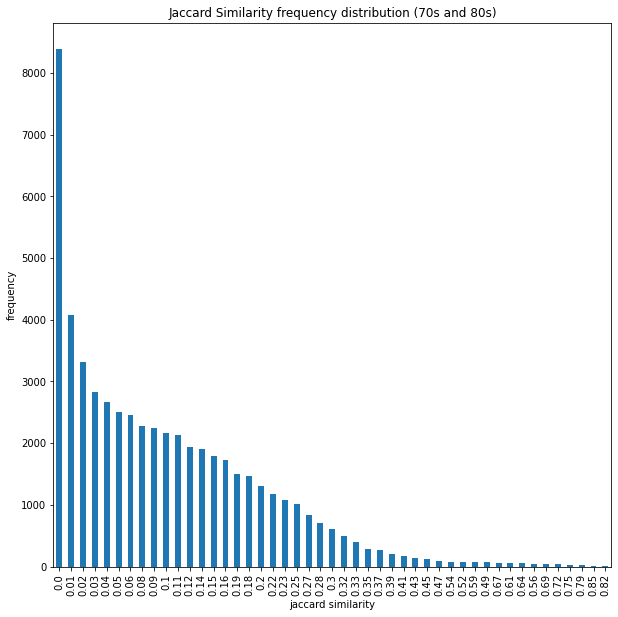

In [141]:
#import matplotlib.pyplot as plt
#70s and 80s
jaccard_similarity_between_models(most_similar['bin1'],most_similar['bin2'],'bin1','bin2')

jaccard_similarity_bin1_bin2_df = pd.DataFrame(jaccard_similarity_set['bin1_bin2'], columns = ['word','jaccard_score'])

fig, ax = plt.subplots()
ax.set_ylabel('frequency')
ax.set_xlabel('jaccard similarity')
ax.set_title('Jaccard Similarity frequency distribution (70s and 80s)')
round(jaccard_similarity_bin1_bin2_df['jaccard_score'],2).value_counts().plot(ax=ax, kind='bar', figsize=(10, 10))

In [138]:
jaccard_similarity_between_models(most_similar['bin1'],most_similar['bin3'],'bin1','bin3')

<AxesSubplot:title={'center':'Jaccard Similarity frequency distribution (70s and 90s)'}, xlabel='jaccard similarity', ylabel='frequency'>

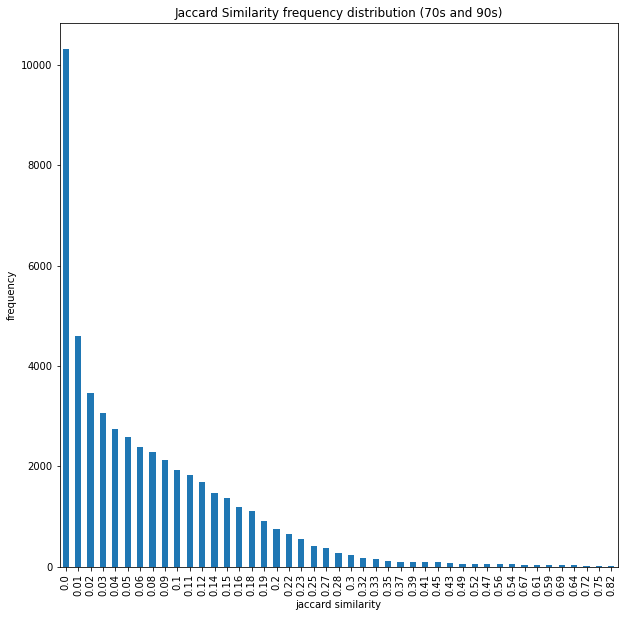

In [139]:
#import matplotlib.pyplot as plt
#70s and 90s
jaccard_similarity_between_models(most_similar['bin1'],most_similar['bin3'],'bin1','bin3')

jaccard_similarity_bin1_bin3_df = pd.DataFrame(jaccard_similarity_set['bin1_bin3'], columns = ['word','jaccard_score'])

fig, ax = plt.subplots()
ax.set_ylabel('frequency')
ax.set_xlabel('jaccard similarity')
ax.set_title('Jaccard Similarity frequency distribution (70s and 90s)')
round(jaccard_similarity_bin1_bin3_df['jaccard_score'],2).value_counts().plot(ax=ax, kind='bar', figsize=(10, 10))

<AxesSubplot:title={'center':'Jaccard Similarity frequency distribution (70s and 00s)'}, xlabel='jaccard similarity', ylabel='frequency'>

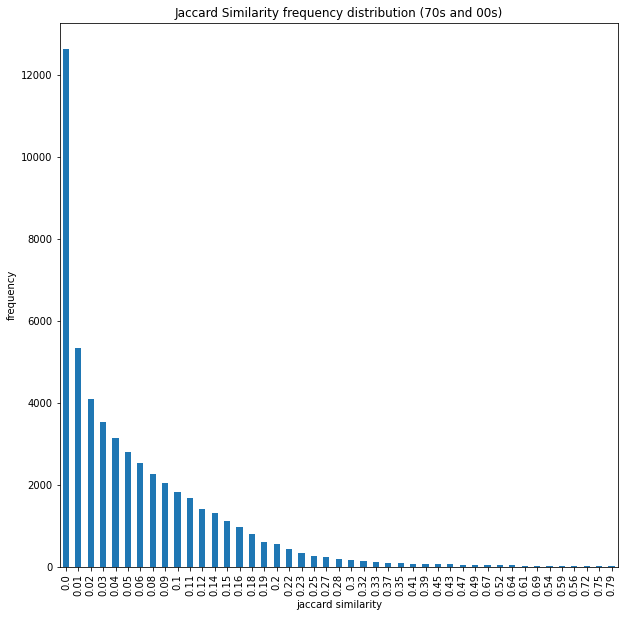

In [140]:
#import matplotlib.pyplot as plt
#70s and 00s
jaccard_similarity_between_models(most_similar['bin1'],most_similar['bin4'],'bin1','bin4')

jaccard_similarity_bin1_bin4_df = pd.DataFrame(jaccard_similarity_set['bin1_bin4'], columns = ['word','jaccard_score'])

fig, ax = plt.subplots()
ax.set_ylabel('frequency')
ax.set_xlabel('jaccard similarity')
ax.set_title('Jaccard Similarity frequency distribution (70s and 00s)')
round(jaccard_similarity_bin1_bin4_df['jaccard_score'],2).value_counts().plot(ax=ax, kind='bar', figsize=(10, 10))

### Matrix to compare Jaccard Similarities across all decades

In [154]:
##########70s###############
#70s and 70s
jaccard_similarity_between_models(most_similar['bin1'],most_similar['bin1'],'bin1','bin1')

jaccard_similarity_bin1_bin1_df = pd.DataFrame(jaccard_similarity_set['bin1_bin1'], columns = ['word','jaccard_score'])

#70s and 80s
jaccard_similarity_between_models(most_similar['bin1'],most_similar['bin2'],'bin1','bin2')
jaccard_similarity_bin1_bin2_df = pd.DataFrame(jaccard_similarity_set['bin1_bin2'], columns = ['word','jaccard_score'])

#70s and 90s
jaccard_similarity_between_models(most_similar['bin1'],most_similar['bin3'],'bin1','bin3')
jaccard_similarity_bin1_bin3_df = pd.DataFrame(jaccard_similarity_set['bin1_bin3'], columns = ['word','jaccard_score'])

#70s and 00s
jaccard_similarity_between_models(most_similar['bin1'],most_similar['bin4'],'bin1','bin4')
jaccard_similarity_bin1_bin4_df = pd.DataFrame(jaccard_similarity_set['bin1_bin4'], columns = ['word','jaccard_score'])

#70s and 10s
jaccard_similarity_between_models(most_similar['bin1'],most_similar['bin5'],'bin1','bin5')
jaccard_similarity_bin1_bin5_df = pd.DataFrame(jaccard_similarity_set['bin1_bin5'], columns = ['word','jaccard_score'])

#70s and 20s
jaccard_similarity_between_models(most_similar['bin1'],most_similar['bin6'],'bin1','bin6')
jaccard_similarity_bin1_bin6_df = pd.DataFrame(jaccard_similarity_set['bin1_bin6'], columns = ['word','jaccard_score'])


##########80s###############
#80s and 70s
jaccard_similarity_between_models(most_similar['bin2'],most_similar['bin1'],'bin2','bin1')
jaccard_similarity_bin2_bin1_df = pd.DataFrame(jaccard_similarity_set['bin2_bin1'], columns = ['word','jaccard_score'])

#80s and 80s
jaccard_similarity_between_models(most_similar['bin2'],most_similar['bin2'],'bin2','bin2')
jaccard_similarity_bin2_bin2_df = pd.DataFrame(jaccard_similarity_set['bin2_bin2'], columns = ['word','jaccard_score'])

#80s and 90s
jaccard_similarity_between_models(most_similar['bin2'],most_similar['bin3'],'bin2','bin3')
jaccard_similarity_bin2_bin3_df = pd.DataFrame(jaccard_similarity_set['bin2_bin3'], columns = ['word','jaccard_score'])

#80s and 00s
jaccard_similarity_between_models(most_similar['bin2'],most_similar['bin4'],'bin2','bin4')
jaccard_similarity_bin2_bin4_df = pd.DataFrame(jaccard_similarity_set['bin2_bin4'], columns = ['word','jaccard_score'])

#80s and 10s
jaccard_similarity_between_models(most_similar['bin2'],most_similar['bin5'],'bin2','bin5')
jaccard_similarity_bin2_bin5_df = pd.DataFrame(jaccard_similarity_set['bin2_bin5'], columns = ['word','jaccard_score'])

#80s and 20s
jaccard_similarity_between_models(most_similar['bin2'],most_similar['bin6'],'bin2','bin6')
jaccard_similarity_bin2_bin6_df = pd.DataFrame(jaccard_similarity_set['bin2_bin6'], columns = ['word','jaccard_score'])


##########90s###############
#90s and 70s
jaccard_similarity_between_models(most_similar['bin3'],most_similar['bin1'],'bin3','bin1')
jaccard_similarity_bin3_bin1_df = pd.DataFrame(jaccard_similarity_set['bin3_bin1'], columns = ['word','jaccard_score'])

#90s and 80s
jaccard_similarity_between_models(most_similar['bin3'],most_similar['bin2'],'bin3','bin2')
jaccard_similarity_bin3_bin2_df = pd.DataFrame(jaccard_similarity_set['bin3_bin2'], columns = ['word','jaccard_score'])

#90s and 90s
jaccard_similarity_between_models(most_similar['bin3'],most_similar['bin3'],'bin3','bin3')
jaccard_similarity_bin3_bin3_df = pd.DataFrame(jaccard_similarity_set['bin3_bin3'], columns = ['word','jaccard_score'])

#90s and 00s
jaccard_similarity_between_models(most_similar['bin3'],most_similar['bin4'],'bin3','bin4')
jaccard_similarity_bin3_bin4_df = pd.DataFrame(jaccard_similarity_set['bin3_bin4'], columns = ['word','jaccard_score'])

#80s and 10s
jaccard_similarity_between_models(most_similar['bin3'],most_similar['bin5'],'bin3','bin5')
jaccard_similarity_bin3_bin5_df = pd.DataFrame(jaccard_similarity_set['bin3_bin5'], columns = ['word','jaccard_score'])

#80s and 20s
jaccard_similarity_between_models(most_similar['bin3'],most_similar['bin6'],'bin3','bin6')
jaccard_similarity_bin3_bin6_df = pd.DataFrame(jaccard_similarity_set['bin3_bin6'], columns = ['word','jaccard_score'])


##########00s###############
#00s and 70s
jaccard_similarity_between_models(most_similar['bin4'],most_similar['bin1'],'bin4','bin1')
jaccard_similarity_bin4_bin1_df = pd.DataFrame(jaccard_similarity_set['bin4_bin1'], columns = ['word','jaccard_score'])

#00s and 80s
jaccard_similarity_between_models(most_similar['bin4'],most_similar['bin2'],'bin4','bin2')
jaccard_similarity_bin4_bin2_df = pd.DataFrame(jaccard_similarity_set['bin4_bin2'], columns = ['word','jaccard_score'])

#00s and 90s
jaccard_similarity_between_models(most_similar['bin4'],most_similar['bin3'],'bin4','bin3')
jaccard_similarity_bin4_bin3_df = pd.DataFrame(jaccard_similarity_set['bin4_bin3'], columns = ['word','jaccard_score'])

#00s and 00s
jaccard_similarity_between_models(most_similar['bin4'],most_similar['bin4'],'bin4','bin4')
jaccard_similarity_bin4_bin4_df = pd.DataFrame(jaccard_similarity_set['bin4_bin4'], columns = ['word','jaccard_score'])

#00s and 10s
jaccard_similarity_between_models(most_similar['bin4'],most_similar['bin5'],'bin4','bin5')
jaccard_similarity_bin4_bin5_df = pd.DataFrame(jaccard_similarity_set['bin4_bin5'], columns = ['word','jaccard_score'])

#00s and 20s
jaccard_similarity_between_models(most_similar['bin4'],most_similar['bin6'],'bin4','bin6')
jaccard_similarity_bin4_bin6_df = pd.DataFrame(jaccard_similarity_set['bin4_bin6'], columns = ['word','jaccard_score'])


##########10s###############
#10s and 70s
jaccard_similarity_between_models(most_similar['bin5'],most_similar['bin1'],'bin5','bin1')
jaccard_similarity_bin5_bin1_df = pd.DataFrame(jaccard_similarity_set['bin5_bin1'], columns = ['word','jaccard_score'])

#10s and 80s
jaccard_similarity_between_models(most_similar['bin5'],most_similar['bin2'],'bin5','bin2')
jaccard_similarity_bin5_bin2_df = pd.DataFrame(jaccard_similarity_set['bin5_bin2'], columns = ['word','jaccard_score'])

#10s and 90s
jaccard_similarity_between_models(most_similar['bin5'],most_similar['bin3'],'bin5','bin3')
jaccard_similarity_bin5_bin3_df = pd.DataFrame(jaccard_similarity_set['bin5_bin3'], columns = ['word','jaccard_score'])

#10s and 00s
jaccard_similarity_between_models(most_similar['bin5'],most_similar['bin4'],'bin5','bin4')
jaccard_similarity_bin5_bin4_df = pd.DataFrame(jaccard_similarity_set['bin5_bin4'], columns = ['word','jaccard_score'])

#10s and 10s
jaccard_similarity_between_models(most_similar['bin5'],most_similar['bin5'],'bin5','bin5')
jaccard_similarity_bin5_bin5_df = pd.DataFrame(jaccard_similarity_set['bin5_bin5'], columns = ['word','jaccard_score'])

#10s and 20s
jaccard_similarity_between_models(most_similar['bin5'],most_similar['bin6'],'bin5','bin6')
jaccard_similarity_bin5_bin6_df = pd.DataFrame(jaccard_similarity_set['bin5_bin6'], columns = ['word','jaccard_score'])


##########20s###############
#20s and 70s
jaccard_similarity_between_models(most_similar['bin6'],most_similar['bin1'],'bin6','bin1')
jaccard_similarity_bin6_bin1_df = pd.DataFrame(jaccard_similarity_set['bin6_bin1'], columns = ['word','jaccard_score'])

#20s and 80s
jaccard_similarity_between_models(most_similar['bin6'],most_similar['bin2'],'bin6','bin2')
jaccard_similarity_bin6_bin2_df = pd.DataFrame(jaccard_similarity_set['bin6_bin2'], columns = ['word','jaccard_score'])

#20s and 90s
jaccard_similarity_between_models(most_similar['bin6'],most_similar['bin3'],'bin6','bin3')
jaccard_similarity_bin6_bin3_df = pd.DataFrame(jaccard_similarity_set['bin6_bin3'], columns = ['word','jaccard_score'])

#20s and 00s
jaccard_similarity_between_models(most_similar['bin6'],most_similar['bin4'],'bin6','bin4')
jaccard_similarity_bin6_bin4_df = pd.DataFrame(jaccard_similarity_set['bin6_bin4'], columns = ['word','jaccard_score'])

#20s and 10s
jaccard_similarity_between_models(most_similar['bin6'],most_similar['bin5'],'bin6','bin5')
jaccard_similarity_bin6_bin5_df = pd.DataFrame(jaccard_similarity_set['bin6_bin5'], columns = ['word','jaccard_score'])

#20s and 20s
jaccard_similarity_between_models(most_similar['bin6'],most_similar['bin6'],'bin6','bin6')
jaccard_similarity_bin6_bin6_df = pd.DataFrame(jaccard_similarity_set['bin6_bin6'], columns = ['word','jaccard_score'])

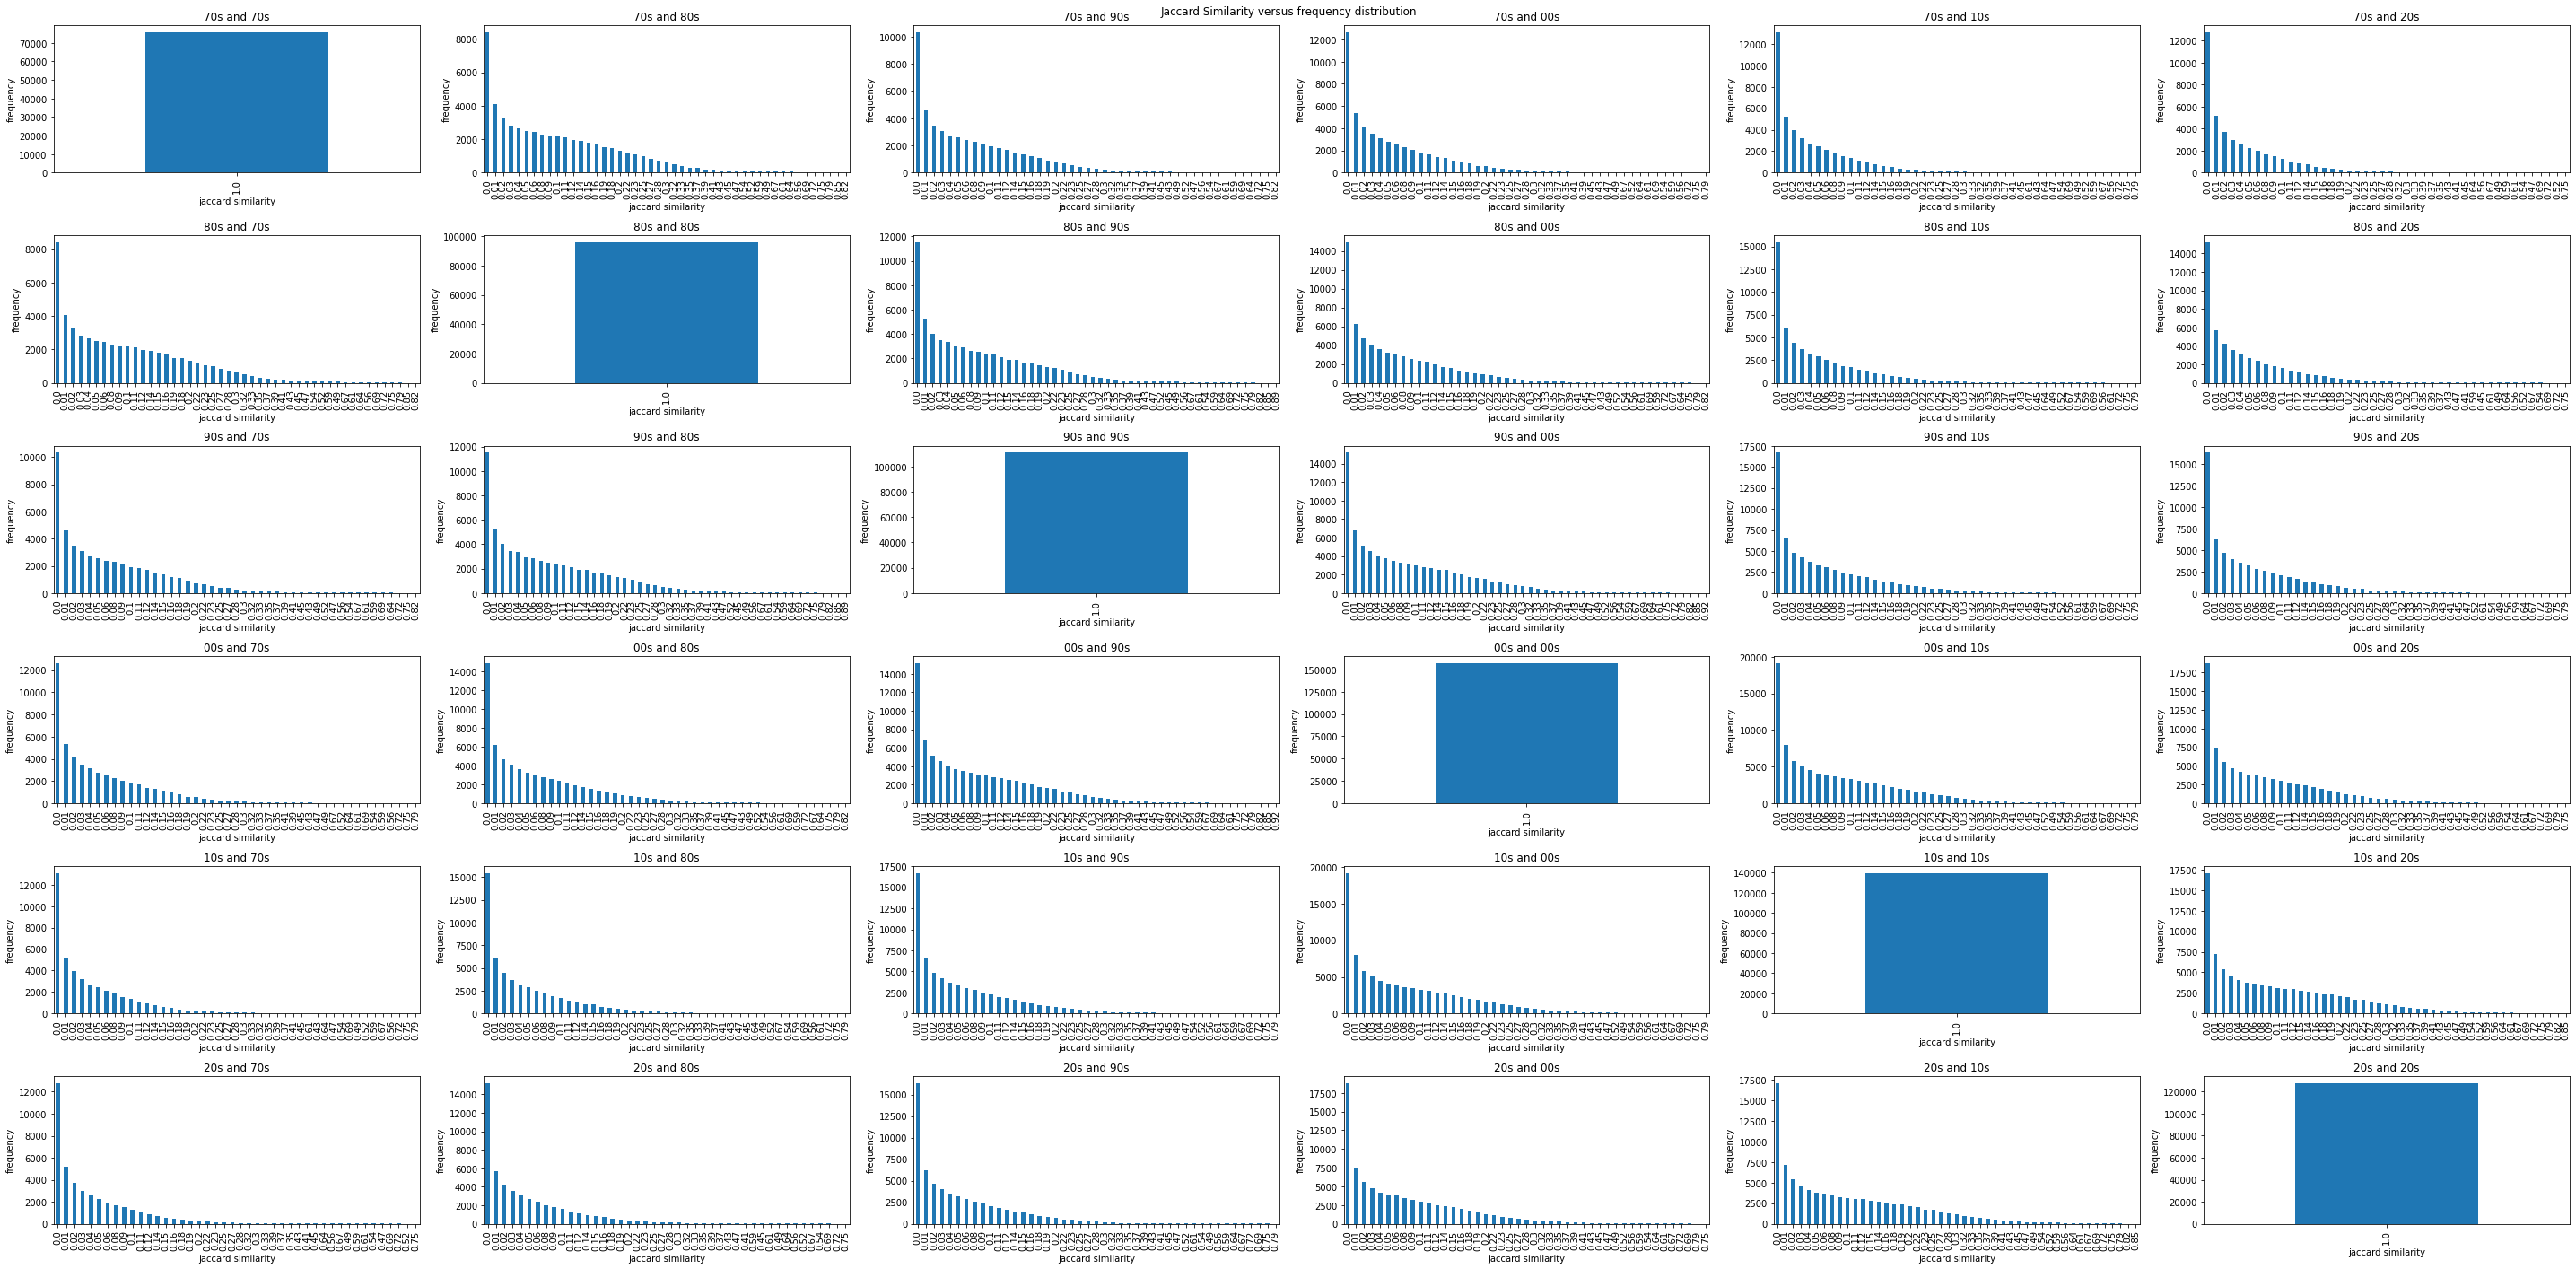

In [179]:
fig, ((ax1, ax2, ax3, ax4, ax5, ax6), (ax7, ax8, ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16, ax17, ax18),
      (ax19, ax20, ax21, ax22, ax23, ax24), (ax25, ax26, ax27, ax28, ax29, ax30),
      (ax31, ax32, ax33, ax34, ax35, ax36)) = plt.subplots(6, 6)
fig.suptitle('Jaccard Similarity versus frequency distribution')

x_ticks = np.arange(0, 1, 0.1)
plt.xticks(x_ticks)

ax1.set_ylabel('frequency')
ax1.set_xlabel('jaccard similarity')
ax1.set_title('70s and 70s')
round(jaccard_similarity_bin1_bin1_df['jaccard_score'],2).value_counts().plot(ax=ax1, kind='bar', figsize=(20, 20))
ax2.set_ylabel('frequency')
ax2.set_xlabel('jaccard similarity')
ax2.set_title('70s and 80s')
round(jaccard_similarity_bin1_bin2_df['jaccard_score'],2).value_counts().plot(ax=ax2, kind='bar', figsize=(20, 20))
ax3.set_ylabel('frequency')
ax3.set_xlabel('jaccard similarity')
ax3.set_title('70s and 90s')
round(jaccard_similarity_bin1_bin3_df['jaccard_score'],2).value_counts().plot(ax=ax3, kind='bar', figsize=(20, 20))
ax4.set_ylabel('frequency')
ax4.set_xlabel('jaccard similarity')
ax4.set_title('70s and 00s')
round(jaccard_similarity_bin1_bin4_df['jaccard_score'],2).value_counts().plot(ax=ax4, kind='bar', figsize=(20, 20))
ax5.set_ylabel('frequency')
ax5.set_xlabel('jaccard similarity')
ax5.set_title('70s and 10s')
round(jaccard_similarity_bin1_bin5_df['jaccard_score'],2).value_counts().plot(ax=ax5, kind='bar', figsize=(20, 20))
ax6.set_ylabel('frequency')
ax6.set_xlabel('jaccard similarity')
ax6.set_title('70s and 20s')
round(jaccard_similarity_bin1_bin6_df['jaccard_score'],2).value_counts().plot(ax=ax6, kind='bar', figsize=(20, 20))

ax7.set_ylabel('frequency')
ax7.set_xlabel('jaccard similarity')
ax7.set_title('80s and 70s')
round(jaccard_similarity_bin2_bin1_df['jaccard_score'],2).value_counts().plot(ax=ax7, kind='bar', figsize=(20, 20))
ax8.set_ylabel('frequency')
ax8.set_xlabel('jaccard similarity')
ax8.set_title('80s and 80s')
round(jaccard_similarity_bin2_bin2_df['jaccard_score'],2).value_counts().plot(ax=ax8, kind='bar', figsize=(20, 20))
ax9.set_ylabel('frequency')
ax9.set_xlabel('jaccard similarity')
ax9.set_title('80s and 90s')
round(jaccard_similarity_bin2_bin3_df['jaccard_score'],2).value_counts().plot(ax=ax9, kind='bar', figsize=(20, 20))
ax10.set_ylabel('frequency')
ax10.set_xlabel('jaccard similarity')
ax10.set_title('80s and 00s')
round(jaccard_similarity_bin2_bin4_df['jaccard_score'],2).value_counts().plot(ax=ax10, kind='bar', figsize=(20, 20))
ax11.set_ylabel('frequency')
ax11.set_xlabel('jaccard similarity')
ax11.set_title('80s and 10s')
round(jaccard_similarity_bin2_bin5_df['jaccard_score'],2).value_counts().plot(ax=ax11, kind='bar', figsize=(20, 20))
ax12.set_ylabel('frequency')
ax12.set_xlabel('jaccard similarity')
ax12.set_title('80s and 20s')
round(jaccard_similarity_bin2_bin6_df['jaccard_score'],2).value_counts().plot(ax=ax12, kind='bar', figsize=(20, 20))

ax13.set_ylabel('frequency')
ax13.set_xlabel('jaccard similarity')
ax13.set_title('90s and 70s')
round(jaccard_similarity_bin3_bin1_df['jaccard_score'],2).value_counts().plot(ax=ax13, kind='bar', figsize=(20, 20))
ax14.set_ylabel('frequency')
ax14.set_xlabel('jaccard similarity')
ax14.set_title('90s and 80s')
round(jaccard_similarity_bin3_bin2_df['jaccard_score'],2).value_counts().plot(ax=ax14, kind='bar', figsize=(20, 20))
ax15.set_ylabel('frequency')
ax15.set_xlabel('jaccard similarity')
ax15.set_title('90s and 90s')
round(jaccard_similarity_bin3_bin3_df['jaccard_score'],2).value_counts().plot(ax=ax15, kind='bar', figsize=(20, 20))
ax16.set_ylabel('frequency')
ax16.set_xlabel('jaccard similarity')
ax16.set_title('90s and 00s')
round(jaccard_similarity_bin3_bin4_df['jaccard_score'],2).value_counts().plot(ax=ax16, kind='bar', figsize=(20, 20))
ax17.set_ylabel('frequency')
ax17.set_xlabel('jaccard similarity')
ax17.set_title('90s and 10s')
round(jaccard_similarity_bin3_bin5_df['jaccard_score'],2).value_counts().plot(ax=ax17, kind='bar', figsize=(20, 20))
ax18.set_ylabel('frequency')
ax18.set_xlabel('jaccard similarity')
ax18.set_title('90s and 20s')
round(jaccard_similarity_bin3_bin6_df['jaccard_score'],2).value_counts().plot(ax=ax18, kind='bar', figsize=(20, 20))

ax19.set_ylabel('frequency')
ax19.set_xlabel('jaccard similarity')
ax19.set_title('00s and 70s')
round(jaccard_similarity_bin4_bin1_df['jaccard_score'],2).value_counts().plot(ax=ax19, kind='bar', figsize=(20, 20))
ax20.set_ylabel('frequency')
ax20.set_xlabel('jaccard similarity')
ax20.set_title('00s and 80s')
round(jaccard_similarity_bin4_bin2_df['jaccard_score'],2).value_counts().plot(ax=ax20, kind='bar', figsize=(20, 20))
ax21.set_ylabel('frequency')
ax21.set_xlabel('jaccard similarity')
ax21.set_title('00s and 90s')
round(jaccard_similarity_bin4_bin3_df['jaccard_score'],2).value_counts().plot(ax=ax21, kind='bar', figsize=(20, 20))
ax22.set_ylabel('frequency')
ax22.set_xlabel('jaccard similarity')
ax22.set_title('00s and 00s')
round(jaccard_similarity_bin4_bin4_df['jaccard_score'],2).value_counts().plot(ax=ax22, kind='bar', figsize=(20, 20))
ax23.set_ylabel('frequency')
ax23.set_xlabel('jaccard similarity')
ax23.set_title('00s and 10s')
round(jaccard_similarity_bin4_bin5_df['jaccard_score'],2).value_counts().plot(ax=ax23, kind='bar', figsize=(20, 20))
ax24.set_ylabel('frequency')
ax24.set_xlabel('jaccard similarity')
ax24.set_title('00s and 20s')
round(jaccard_similarity_bin4_bin6_df['jaccard_score'],2).value_counts().plot(ax=ax24, kind='bar', figsize=(20, 20))

ax25.set_ylabel('frequency')
ax25.set_xlabel('jaccard similarity')
ax25.set_title('10s and 70s')
round(jaccard_similarity_bin5_bin1_df['jaccard_score'],2).value_counts().plot(ax=ax25, kind='bar', figsize=(20, 20))
ax26.set_ylabel('frequency')
ax26.set_xlabel('jaccard similarity')
ax26.set_title('10s and 80s')
round(jaccard_similarity_bin5_bin2_df['jaccard_score'],2).value_counts().plot(ax=ax26, kind='bar', figsize=(20, 20))
ax27.set_ylabel('frequency')
ax27.set_xlabel('jaccard similarity')
ax27.set_title('10s and 90s')
round(jaccard_similarity_bin5_bin3_df['jaccard_score'],2).value_counts().plot(ax=ax27, kind='bar', figsize=(20, 20))
ax28.set_ylabel('frequency')
ax28.set_xlabel('jaccard similarity')
ax28.set_title('10s and 00s')
round(jaccard_similarity_bin5_bin4_df['jaccard_score'],2).value_counts().plot(ax=ax28, kind='bar', figsize=(20, 20))
ax29.set_ylabel('frequency')
ax29.set_xlabel('jaccard similarity')
ax29.set_title('10s and 10s')
round(jaccard_similarity_bin5_bin5_df['jaccard_score'],2).value_counts().plot(ax=ax29, kind='bar', figsize=(20, 20))
ax30.set_ylabel('frequency')
ax30.set_xlabel('jaccard similarity')
ax30.set_title('10s and 20s')
round(jaccard_similarity_bin5_bin6_df['jaccard_score'],2).value_counts().plot(ax=ax30, kind='bar', figsize=(20, 20))

ax31.set_ylabel('frequency')
ax31.set_xlabel('jaccard similarity')
ax31.set_title('20s and 70s')
round(jaccard_similarity_bin6_bin1_df['jaccard_score'],2).value_counts().plot(ax=ax31, kind='bar', figsize=(20, 20))
plt.xticks(np.arange(0, 1, 0.1))
ax32.set_ylabel('frequency')
ax32.set_xlabel('jaccard similarity')
ax32.set_title('20s and 80s')
round(jaccard_similarity_bin6_bin2_df['jaccard_score'],2).value_counts().plot(ax=ax32, kind='bar', figsize=(20, 20))
ax33.set_ylabel('frequency')
ax33.set_xlabel('jaccard similarity')
ax33.set_title('20s and 90s')
round(jaccard_similarity_bin6_bin3_df['jaccard_score'],2).value_counts().plot(ax=ax33, kind='bar', figsize=(20, 20))
ax34.set_ylabel('frequency')
ax34.set_xlabel('jaccard similarity')
ax34.set_title('20s and 00s')
round(jaccard_similarity_bin6_bin4_df['jaccard_score'],2).value_counts().plot(ax=ax34, kind='bar', figsize=(20, 20))
ax35.set_ylabel('frequency')
ax35.set_xlabel('jaccard similarity')
ax35.set_title('20s and 10s')
round(jaccard_similarity_bin6_bin5_df['jaccard_score'],2).value_counts().plot(ax=ax35, kind='bar', figsize=(20, 20))
ax36.set_ylabel('frequency')
ax36.set_xlabel('jaccard similarity')
ax36.set_title('20s and 20s')
round(jaccard_similarity_bin6_bin6_df['jaccard_score'],2).value_counts().plot(ax=ax36, kind='bar', figsize=(50, 20))

fig.tight_layout()
plt.show()
#for ax in fig.get_axes():
#    ax.label_outer()